# Text Feature Extraction

*Features* are derived values from our complex data. They should measure
certain distinctive properties of our data in order to achieve
*dimensionality reduction*. For each observation a *feature vector* is
created (usually with numerical or categorical values) → *Vector Space
Model*.

For linguists, these features might already be interesting. Using
machine learning, it might be possible to detect which language a word
comes from.

**Choosing the right properties for your features greatly depends on
want you want to analyse / which methods you want to use** → own
discipline ["Feature
engineering"](https://en.wikipedia.org/wiki/Feature_engineering)

We will concentrate on *Term vector models*:

-   in a corpus \$D\$ we have a set of \$n\$ *documents*\[1\] \$d_1,
    d_2, \\dots, d_n\$ containing *terms*\[2\] \$t\$
-   all unique terms in \$D\$ make up the *vocabulary*
-   each document contains a feature vector \$x\$ of length \$m =
    N\_{vocabulary}\$
-   a feature vector contains *weights* \$w_i\$ of the \$i\$th term of
    the vocabulary in that document

\$M = \\{x_1,x_2, ..., x_n\\}\$ with \$x = \\{w_1, w_2, ..., w_m\\}\$

<span class="small">\[1\]: Documents are the things you compare. They
can be paragraphs, sentences, tweets, articles, etc.</span>  
<span class="small">\[2\]: A.k.a. tokens or words in this
context.</span>

**Consequences:**

-   completely based on term weights → weights might denote "importance"
    of terms in a given document
-   term weights usually derived from term frequency
-   does *generally* not take into account: word order,
    grammar/syntactic structure → information how words **relate** to
    each other in a document is **lost**
-   useful for:
    -   Text classification (Spam/Not Spam, categories, language)
    -   Summarization / topic discovery
    -   Text similarity / clustering
-   **not** useful for:
    -   Semantic and Sentiment Analysis


## Bag-of-Words (BoW) model
  
  
-   simple but powerful model
-   features are **absolute term counts**
-   basis for:
    -   Topic Modeling with *Latent Dirichlet Allocation (LDA)* via
        *Gibbs sampling*
    -   Text classification with *Naive Bayes*, *Support Vector
        Machines*
    -   Document similarity
    -   Document clustering
    -   ...

**Example:**

\\begin{equation\*} C = \\{D_1, D_2, D_3\\} \\\\ D_1=\\{simple, yet,
beautiful, example\\} \\\\ D_2=\\{beautiful, beautiful, flower\\} \\\\
D_3=\\{example, great, example\\} \\end{equation\*}

\\begin{equation\*} vocab=\\{beautiful, example, flowers,
great, simple, yet\\} \\end{equation\*}

| *document* | beautiful | example | flowers | great | simple | yet |
|------------|-------:|----:|----------:|--------:|--------:|------:|
| \$D_1\$    |         1 |       1 |       0 |     0 |      1 |   1 |  
| \$D_2\$    |         2 |       0 |       1 |     0 |      0 |   0 | 
| \$D_3\$    |         0 |       2 |       0 |     1 |      0 |   0 |  


### Example implementation
-   we use a
    [`Counter`](https://docs.python.org/3.5/library/collections.html?highlight=counter#collections.Counter)
    to count the term frequencies in our corpus


In [1]:
documents = {
    'doc1': ['good', 'movie'],
    'doc2': [ 'not', 'a',  'good', 'movie'],
    'doc3': ['did', 'not', 'like'],     
}

### 1. Count the tokens for each document:

In [2]:
from collections import Counter

example_data = ['a', 'a', 'b', 'c', 'c']
example_counter = Counter(example_data)
example_counter

Counter({'a': 2, 'b': 1, 'c': 2})

In [3]:
counts = {doc_label: Counter(tokens) for doc_label, tokens in documents.items()}
counts

{'doc1': Counter({'good': 1, 'movie': 1}),
 'doc2': Counter({'not': 1, 'a': 1, 'good': 1, 'movie': 1}),
 'doc3': Counter({'did': 1, 'not': 1, 'like': 1})}

### 2. extract the vocabulary (set of unique terms in all documents):

In [4]:
def create_vocab(documents):
    vocab = set()
    for tokens in documents.values():
        vocab |= set(tokens) # 并集运算
    return vocab

In [5]:
vocab = create_vocab(documents)
vocab

{'a', 'did', 'good', 'like', 'movie', 'not'}

### 3. Create the BoW matrix:

Create Bag of Words matrix: rows are documents, columns are vocabulary words (unique tokens)

In [6]:
def create_bow(counts, vocab):
    bow = []
    for counter in counts.values():
        bow.append([counter.get(term, 0) for term in vocab])
    return bow

In [7]:
bow = create_bow(counts, vocab)
bow

[[0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 0]]

Plot heatmap

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(bow, xticklabels, yticklabels, title=''):
    fig, ax = plt.subplots(figsize=(12,5))
    im = ax.imshow(bow)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(range(len(xticklabels)))
    ax.set_xticklabels(xticklabels)
    ax.set_yticks(range(len(yticklabels)))
    ax.set_yticklabels(yticklabels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    threshold = 30
    for i in range(len(yticklabels)):
        for j in range(len(xticklabels)):
            text = ax.text(j, i, round(bow[i][j], 2), ha="center", va="center", color='r')

    plt.xlabel('Terms')
    plt.ylabel('Documents')
    plt.title(title)

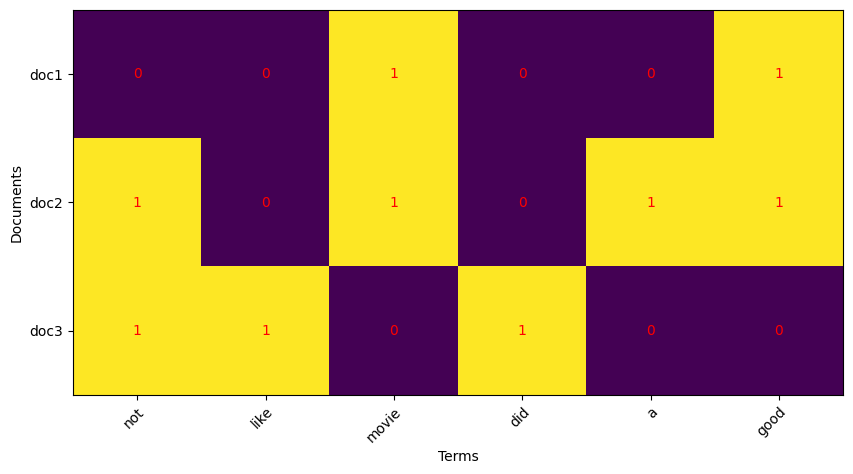

In [9]:
plot_heatmap(bow, vocab, documents.keys())

With [sklearn.feature_extraction.text.CountVectorizer()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

texts  = ['good movie', 'not a good movie', 'did not like']
# TODO



## n-grams<a href="http://dsspace.wzb.eu/pyug/text_proc_feature_extraction/#n-grams" class="anchor-link">¶</a>

BoW can be used in conjuction with
*[n-grams](https://en.wikipedia.org/wiki/N-gram)*.

> an n-gram is a contiguous sequence of n items from a given sequence of
> text or speech


Bigrams of our tokens:

In [11]:
from nltk import ngrams

[terms for terms in ngrams(documents['doc2'], n=2)]

[('not', 'a'), ('a', 'good'), ('good', 'movie')]

Count the n-grams for each document

In [12]:
documents_bi = {doc_label: doc_token + 
                [' '.join(terms) for terms in ngrams(doc_token, n=2)] 
                for doc_label, doc_token in documents.items()}
documents_bi

{'doc1': ['good', 'movie', 'good movie'],
 'doc2': ['not', 'a', 'good', 'movie', 'not a', 'a good', 'good movie'],
 'doc3': ['did', 'not', 'like', 'did not', 'not like']}

Create bigrams vocabulary

In [13]:
vocab_bi = create_vocab(documents_bi)
vocab_bi

{'a',
 'a good',
 'did',
 'did not',
 'good',
 'good movie',
 'like',
 'movie',
 'not',
 'not a',
 'not like'}

Create bigrams matrix

In [14]:
counts_bi = {doc_label: Counter(tokens) for doc_label, tokens in documents_bi.items()}
counts_bi

{'doc1': Counter({'good': 1, 'movie': 1, 'good movie': 1}),
 'doc2': Counter({'not': 1,
          'a': 1,
          'good': 1,
          'movie': 1,
          'not a': 1,
          'a good': 1,
          'good movie': 1}),
 'doc3': Counter({'did': 1, 'not': 1, 'like': 1, 'did not': 1, 'not like': 1})}

In [15]:
bow_bi = create_bow(counts_bi, vocab_bi)
bow_bi

[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]]

Plot heatmap

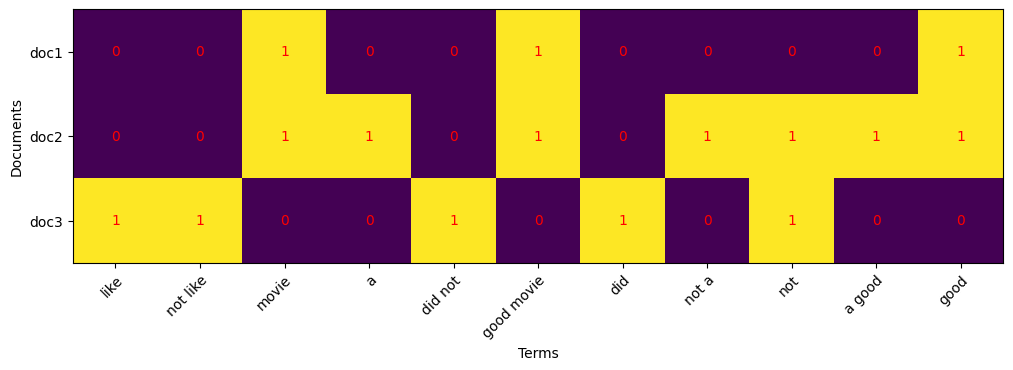

In [16]:
plot_heatmap(bow_bi, vocab_bi, documents_bi.keys())

# tf-idf

Problem with BoW: Common words that occur often in many documents
overshadow more specific (potentially more interesting) words → can be
reduced with stopwords → manual effort

*tf-idf* tries to decrease the weight of words that occur across many
documents → lower the weight of common words.

\\begin{equation\*} tfidf(t, d, D) = tf(t, d) \\cdot idf(t, D)
\\end{equation\*}

-   \$tf\$ .. term frequency – related to BoW (raw count or proportion
    for \$t\$ in \$d\$)
-   \$idf\$ .. inverse document frequency – measures how common a word
    \$t\$ is across all documents in corpus \$D\$

### tf – term frequency

Better to use *relative frequencies* than absolute counts: We calculate
the term count proportions \$tf(t, d) = \\frac{f\_{t,d}}{\|d\|}\$ for a
term \$t\$ in a document \$d\$. This prevents that documents with many
words get higher weights than those with few words.


Calculate tf (We need to convert our BoW to a NumPy matrix type for easier calculation.)

In [17]:
raw_counts = np.mat(bow_bi, dtype=float)
tf = raw_counts / np.sum(raw_counts, axis=1)
tf

matrix([[0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.33333333, 0.        , 0.        , 0.        , 0.        ,
         0.33333333],
        [0.        , 0.        , 0.14285714, 0.14285714, 0.        ,
         0.14285714, 0.        , 0.14285714, 0.14285714, 0.14285714,
         0.14285714],
        [0.2       , 0.2       , 0.        , 0.        , 0.2       ,
         0.        , 0.2       , 0.        , 0.2       , 0.        ,
         0.        ]])

Plot heatmap

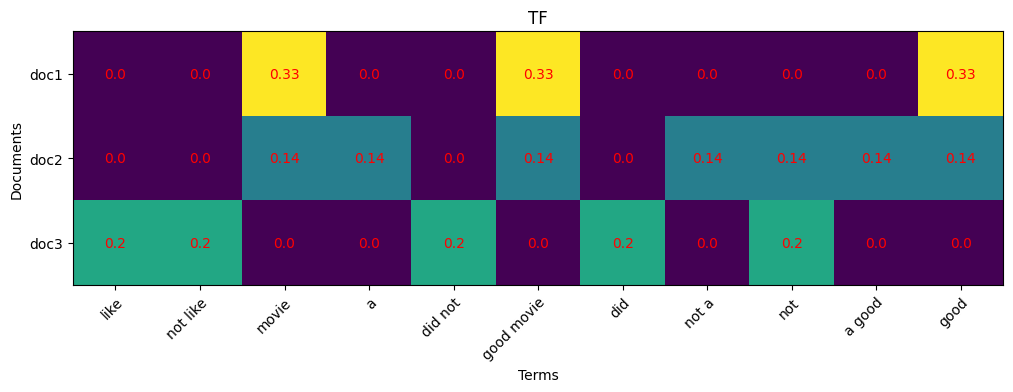

In [18]:
plot_heatmap(tf.tolist(), vocab_bi, documents_bi.keys(), 'TF')

### idf – inverse document frequency

Different [weighting schemes
available](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency_2).
We use this one:

\\begin{equation\*} idf(t, D) = log (\\frac{N}{\|d \\in D : t \\in
d\|})
\\end{equation\*}

-   \$t\$ .. a term (a.k.a. token or word)

-   \$N\$ .. number of documents in corpus \$D\$

-   \$\|d \\in D : t \\in d\|\$ .. number of documents in which \$t\$
    appears

Calculate the number of documents in which \$t\$ appears (i.e., \$\|d \\in D : t \\in d\|\$ )

In [19]:
def num_terms_in_docs(t, docs):
    return sum(t in d for d in docs.values())

In [20]:
num_terms_in_docs('good', documents_bi) # 有'good'的文档数目

2

Calculate idf

In [21]:
from math import log

def idf(t, docs):
    return log(len(docs) / num_terms_in_docs(t, docs))

In [22]:
idf('good', documents_bi)

0.4054651081081644

In [23]:
idf_row = [idf(t, documents_bi) for t in vocab_bi]
idf_row

[1.0986122886681098,
 1.0986122886681098,
 0.4054651081081644,
 1.0986122886681098,
 1.0986122886681098,
 0.4054651081081644,
 1.0986122886681098,
 1.0986122886681098,
 0.4054651081081644,
 1.0986122886681098,
 0.4054651081081644]

Plot heatmap

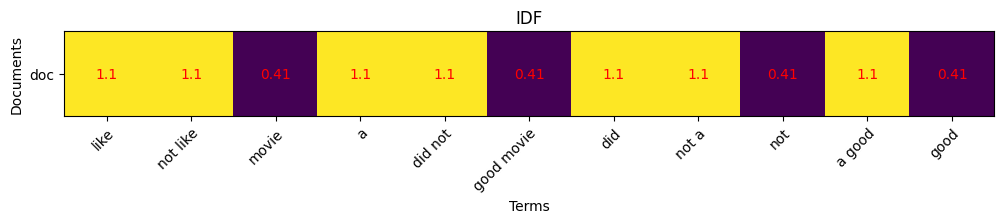

In [24]:
plot_heatmap([idf_row], vocab_bi, ['doc'], 'IDF')

### Create tfidf 

Create *tfidf* matrix by converting idf_row to a diagonal matrix and multiplying tf with it:

In [25]:
tfidf = tf * np.diag(idf_row)
tfidf

matrix([[0.        , 0.        , 0.13515504, 0.        , 0.        ,
         0.13515504, 0.        , 0.        , 0.        , 0.        ,
         0.13515504],
        [0.        , 0.        , 0.05792359, 0.15694461, 0.        ,
         0.05792359, 0.        , 0.15694461, 0.05792359, 0.15694461,
         0.05792359],
        [0.21972246, 0.21972246, 0.        , 0.        , 0.21972246,
         0.        , 0.21972246, 0.        , 0.08109302, 0.        ,
         0.        ]])

In [26]:
np.multiply(tf, np.array(idf_row))

matrix([[0.        , 0.        , 0.13515504, 0.        , 0.        ,
         0.13515504, 0.        , 0.        , 0.        , 0.        ,
         0.13515504],
        [0.        , 0.        , 0.05792359, 0.15694461, 0.        ,
         0.05792359, 0.        , 0.15694461, 0.05792359, 0.15694461,
         0.05792359],
        [0.21972246, 0.21972246, 0.        , 0.        , 0.21972246,
         0.        , 0.21972246, 0.        , 0.08109302, 0.        ,
         0.        ]])

Plot heatmap

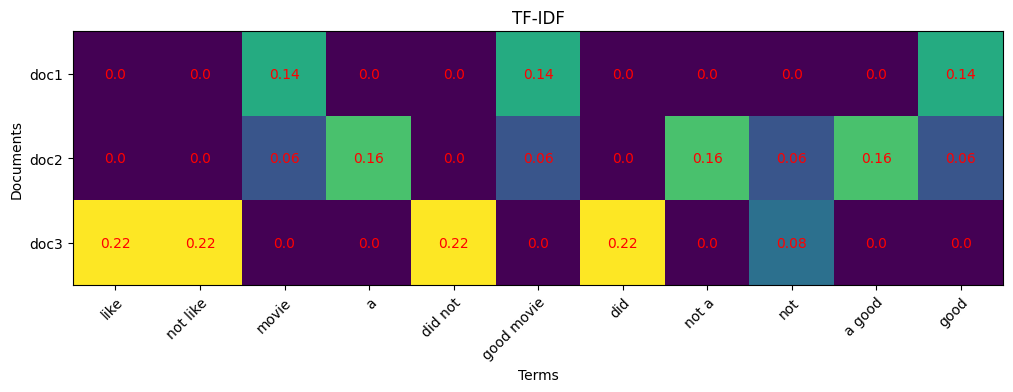

In [27]:
plot_heatmap(tfidf.tolist(), vocab_bi, documents_bi.keys(), 'TF-IDF')

Values in tf-idf matrix are dependent on term frequency (`tf`) and the
inverse document frequency (`idf_mat`). Tokens that occur in many
documents (low `idf` value) get lower individual tf-idf values.

With [sklearn.feature_extraction.text.TfidfVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

tfidf_class = TfidfVectorizer(min_df=0.5, # 希望筛选出来的term的frequency最小不少于0.5，最多不超过2
                        max_df=2, 
                        ngram_range=(1, 2) # gram的数量为1-2个
                       )
features = tfidf_class.fit_transform(corpus)
features.todense()

matrix([[0.5       , 0.5       , 0.5       , 0.5       ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.57735027, 0.57735027, 0.57735027, 0.        ]])


## tf-idf in practice

tf-idf can be used as feature matrix for:

-   Topic Modeling (*Latent Semantic Indexing (LSI)*, *Non-negative
    Matrix Factorization (NNMF), Latent Dirichlet Allocation \[1\]*)
-   Document similarity
-   Document clustering

## Recommended Python packages for BoW and tf-idf

-   [gensim](http://radimrehurek.com/gensim/)
    -   [doc2bow](http://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.doc2bow)
    -   [TfIdfModel](http://radimrehurek.com/gensim/models/tfidfmodel.html)
-   [scikit-learn](http://scikit-learn.org/stable/index.html)
    -   [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    -   [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

<span class="small"></span>

<span class="small"></span>